<a href="https://colab.research.google.com/github/naomideutsch/Deep_Prior/blob/master/deep_prior_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-gpu==1.15

In [ ]:
!git clone https://github.com/naomideutsch/Deep_Prior

In [ ]:
cd Deep_Prior

In [ ]:
!git pull
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%matplotlib inline

from PIL import Image
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


def read_images(image_path):
  pil_image = Image.open(image_path)
  pil_image.resize((512,512), Image.ANTIALIAS)
  return np.array(pil_image)


def plot_results(orignal_path, preprocessed_path, result):
  images_names = os.listdir(orignal_path)
  # fig, axes = plt.subplots(nrows=len(images_names), ncols=3)
  for i in range(len(images_names)):
    fig, axes = plt.subplots(nrows=1, ncols=3)
    name = images_names[i]
    orig_img = read_images(os.path.join(orignal_path, name))
    preprocessed_img = read_images(os.path.join(preprocessed_path, name))
    resize_img = read_images(os.path.join(result, name))

    axes[0].imshow(orig_img)
    axes[1].imshow(preprocessed_img)
    axes[2].imshow(resize_img)
    plt.show()

## **Deblurring**

Preprocessing blurred images

### *Gussian Kernal*

####**Blurring**


Full resolution

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/full_resolution_stylegan" --output-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/blurred" --kernel-size=25 --sigma=10 --kernel-type="gauss"

Low resulotion

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/lr_stylegan" --output-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/blurred" --kernel-size=3 --sigma=2 --kernel-type="gauss"

####**Deblurring**

2500 iterations + regularization

In [ ]:
!python deblurring.py --input-size 1024 1024 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/deblurred_reg_2500" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/latents_dir_reg_2500" --kernel-size=25 --sigma=10 --beta=0.1 --reg="grad" --kernel-type="gauss" --total-iterations=2500

In [ ]:
!python deblurring.py --input-size 128 128 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/deblurred_reg_2500" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/latents_dir_reg_2500" --kernel-size=3 --sigma=2 --beta=0.1 --reg="grad" --kernel-type="gauss" --total-iterations=2500

1000 iterations + no regularization

In [ ]:
!python deblurring.py --input-size 1024 1024 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/deblurred_no_reg_1000" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/latents_dir_no_reg_1000" --kernel-size=25 --sigma=10 --beta=0.0 --reg="grad" --kernel-type="gauss" --total-iterations=1000

In [ ]:
!python deblurring.py --input-size 128 128 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/deblurred_no_reg_1000" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/latents_dir_no_reg_1000" --kernel-size=3 --sigma=2 --beta=0.0 --reg="grad" --kernel-type="gauss" --total-iterations=1000

1000 iterations + regularization

In [ ]:
!python deblurring.py --input-size 1024 1024 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/deblurred_reg_1000" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/latents_dir_reg_1000" --kernel-size=25 --sigma=10 --beta=0.1 --reg="grad" --kernel-type="gauss" --total-iterations=1000

In [ ]:
!python deblurring.py --input-size 128 128 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/deblurred_reg_1000" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/gauss/3_2/low_res/latents_dir_reg_1000" --kernel-size=3 --sigma=2 --beta=0.1 --reg="grad" --kernel-type="gauss" --total-iterations=1000

####**Results**

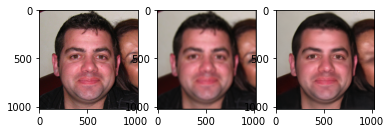

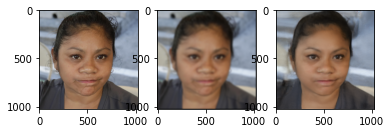

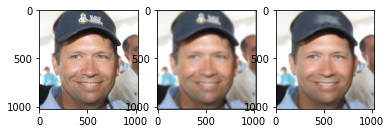

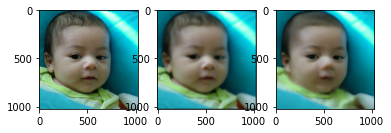

In [18]:
plot_results("dataset/full_resolution_stylegan", "/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/blurred", "/content/drive/My Drive/Colab Notebooks/ex3/gauss/25_10/full_res/deblurred_reg_2500")

### *X Motion Kernal*

####**Blurring**


Full resolution

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/full_resolution_stylegan" --output-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/blurred" --kernel-size=25 --kernel-type="x_motion"

Low resulotion

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/lr_stylegan" --output-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/blurred" --kernel-size=5 --kernel-type="x_motion"

####**Deblurring**

2500 iterations + regularization

In [ ]:
!python deblurring.py --input-size 1024 1024 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/deblurred_reg_2500" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/latents_dir_reg_2500" --kernel-size=25 --beta=0.1 --reg="grad" --kernel-type="x_motion" --total-iterations=2500

In [ ]:
!python deblurring.py --input-size 128 128 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/deblurred_reg_2500" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/latents_dir_reg_2500" --kernel-size=5 --beta=0.1 --reg="grad" --kernel-type="x_motion" --total-iterations=2500

1000 iterations + no regularization

In [ ]:
!python deblurring.py --input-size 1024 1024 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/deblurred_no_reg_1000" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/latents_dir_no_reg_1000" --kernel-size=25 --beta=0.0 --reg="grad" --kernel-type="x_motion" --total-iterations=1000

In [ ]:
!python deblurring.py --input-size 128 128 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/deblurred_no_reg_1000" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/latents_dir_no_reg_1000" --kernel-size=5 --beta=0.0 --reg="grad" --kernel-type="x_motion" --total-iterations=1000

1000 iterations + regularization

In [ ]:
!python deblurring.py --input-size 1024 1024 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/deblurred_reg_1000" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/latents_dir_reg_1000" --kernel-size=25 --beta=0.1 --reg="grad" --kernel-type="x_motion" --total-iterations=1000

In [ ]:
!python deblurring.py --input-size 128 128 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/deblurred_reg_1000" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/x_motion/5/low_res/latents_dir_reg_1000" --kernel-size=5 --beta=0.1 --reg="grad" --kernel-type="x_motion" --total-iterations=1000

####**Results**  [2500 iterations with regularization]

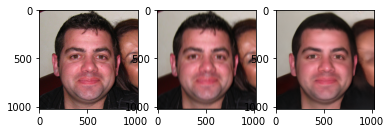

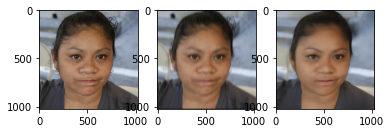

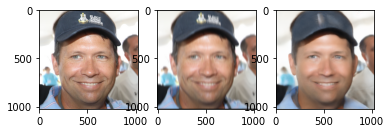

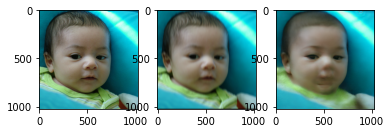

In [20]:
plot_results("dataset/full_resolution_stylegan", "/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/blurred", "/content/drive/My Drive/Colab Notebooks/ex3/x_motion/25/full_res/deblurred_reg_2500")

### *Disk Kernal*

####**Blurring**


Full resolution

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/full_resolution_stylegan" --output-dir="/content/drive/My Drive/Colab Notebooks/ex3/disk/25/full_res/blurred" --kernel-size=25 --kernel-type="disk"

####**Deblurring**

2500 iterations + regularization

In [ ]:
!python deblurring.py --input-size 1024 1024 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/disk/25/full_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/disk/25/full_res/deblurred_reg_2500" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/disk/25/full_res/latents_dir_reg_2500" --kernel-size=25 --beta=0.1 --reg="grad" --kernel-type="disk" --total-iterations=2500

####**Results**  [2500 iterations with regularization]

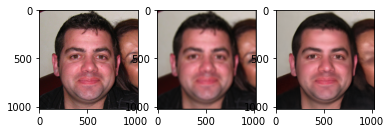

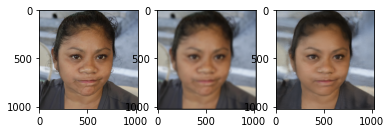

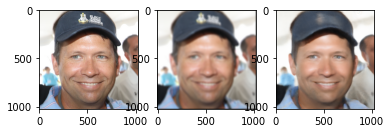

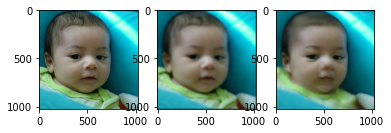

In [21]:
plot_results("dataset/full_resolution_stylegan", "/content/drive/My Drive/Colab Notebooks/ex3/disk/25/full_res/blurred", "/content/drive/My Drive/Colab Notebooks/ex3/disk/25/full_res/deblurred_reg_2500")

### *Y Motion Kernal*

####**Blurring**


Full resolution

In [ ]:
!python preprocessing/blur_preprocessing.py --img-dir="dataset/full_resolution_stylegan" --output-dir="/content/drive/My Drive/Colab Notebooks/ex3/y_motion/17/full_res/blurred" --kernel-size=17 --kernel-type="y_motion"

####**Deblurring**

2500 iterations + regularization

In [ ]:
!python deblurring.py --input-size 1024 1024 --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/y_motion/17/full_res/blurred" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/y_motion/17/full_res/deblurred_reg_2500" --latents-dir="/content/drive/My Drive/Colab Notebooks/ex3/y_motion/17/full_res/latents_dir_reg_2500" --kernel-size=17 --reg="grad" --kernel-type="y_motion" --total-iterations=2500

####**Results** [2500 iterations with regularization]

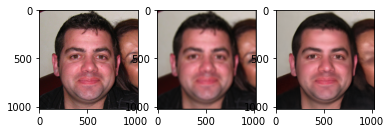

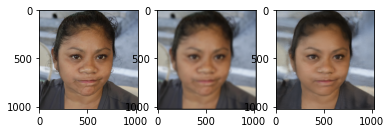

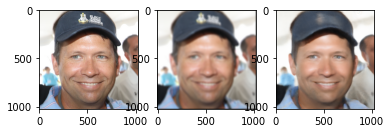

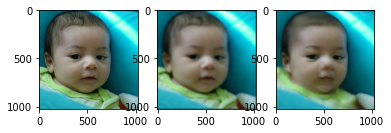

In [ ]:
plot_results("dataset/full_resolution_stylegan", "/content/drive/My Drive/Colab Notebooks/ex3/y_motion/17/full_res/blurred", "/content/drive/My Drive/Colab Notebooks/ex3/y_motion/17/full_res/deblurred_reg_2500")

# **Colorization**

##Preprocessing

In [ ]:
!python preprocessing/colorization_preprocessing.py --img-dir="dataset/full_resolution_stylegan" --output-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/gray"

In [ ]:
!python preprocessing/colorization_preprocessing.py --img-dir="dataset/lr_stylegan" --output-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/low_res/gray"

##Colorization

Results [full resolution + 2500 iterations + no regularization]

In [ ]:
!python deblurring.py --input-size 1024 1024 --m="color" --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/gray" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/colorized/2500/no_reg" --latents-dir="/content/drive/My Drive/Colab Notebooks/colorization/full_res/latents_dir/2500/no_reg" --beta=0.0 --total-iterations=2500 --reg="none"

Results [full resolution + 1000 iterations + no regularization]

In [ ]:
!python deblurring.py --input-size 1024 1024 --m="color" --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/gray" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/colorized/1000/no_reg" --latents-dir="/content/drive/My Drive/Colab Notebooks/colorization/full_res/latents_dir/1000/no_reg" --total-iterations=1000 --beta=0.0 --reg="none"

Results [full resolution + 2500 iterations + regularization]

In [ ]:
!python deblurring.py --input-size 1024 1024 --m="color" --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/gray" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/colorized/2500/reg" --latents-dir="/content/drive/My Drive/Colab Notebooks/colorization/full_res/latents_dir/2500/reg" --total-iterations=2500 --beta=0.1 --reg="grad"

Results [full resolution + 1000 iterations + regularization]

In [ ]:
!python deblurring.py --input-size 1024 1024 --m="color" --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/gray" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/colorized/1000/reg" --latents-dir="/content/drive/My Drive/Colab Notebooks/colorization/full_res/latents_dir/1000/reg" --total-iterations=1000 --beta=0.1 --reg="grad"

Results [low resolution + 1000 iterations + no regularization]

In [ ]:
!python deblurring.py --input-size 128 128 --m="color" --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/low_res/gray" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/low_res/colorized/1000/no_reg" --latents-dir="/content/drive/My Drive/Colab Notebooks/colorization/low_res/latents_dir/1000/no_reg" --total-iterations=1000 --beta=0.0 --reg="grad"

Results [full resolution + 1000 iterations + regularization]

In [ ]:
!python deblurring.py --input-size 128 128 --m="color" --ckpt="/content/drive/My Drive/Colab Notebooks/styleGAN_weights/karras2019stylegan-ffhq-1024x1024.pkl" --blurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/low_res/gray" --deblurred-imgs-dir="/content/drive/My Drive/Colab Notebooks/ex3/colorization/low_res/colorized/1000/reg" --latents-dir="/content/drive/My Drive/Colab Notebooks/colorization/low_res/latents_dir/1000/reg" --total-iterations=1000 --beta=0.1 --reg="grad"

## **Results** [2500 iterations without regularization]

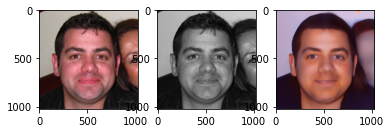

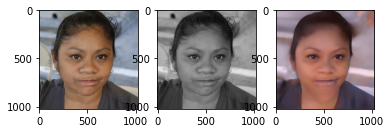

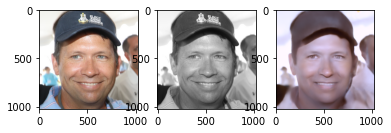

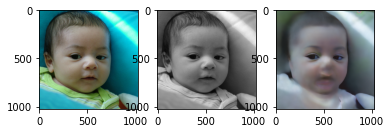

In [23]:
plot_results("dataset/full_resolution_stylegan", "/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/gray", "/content/drive/My Drive/Colab Notebooks/ex3/colorization/full_res/colorized/2500/no_reg")